# Logistic Regression
Within this activity, we're going to try to predict whether or not someone has diebetes (i.e. has diabetes means `Outcome = 1`) based on several numeric features. The dataset that we'll be working with consists of 8 columns and we'll be doing the following:
- Loading in the dataset
- Checking if there are any NaNs.
- Checking if there are any categorical variables and if so, one-hot encode them.
- Plot the distribution of BMI's for those with diabetes (Outcome=1) and those without (Outcome=0)
- Split the dataset into a training/testing set.
- Train the Logistic Regression Model
- Predict on the test set.

In [36]:
# Load in the dataset.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv("./data/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Are there any rows with NaN's? If so, delete them.
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Are there any categorical variables? If so, one-hot encode them?
data.info()
# no categorical values so no hot encoding required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='BMI', ylabel='Count'>

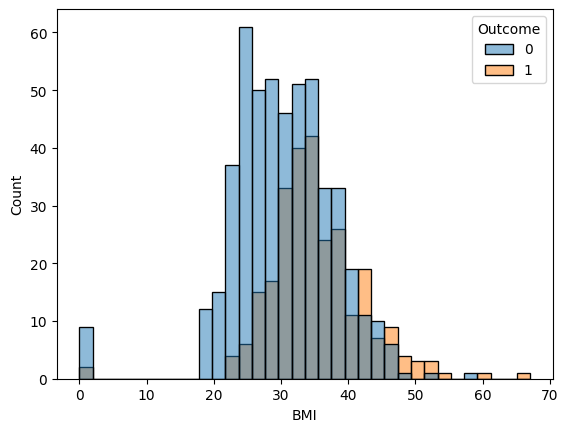

In [11]:
# Using Seaborn, plot the distribution of BMI's for those with diabetes (Outcome=1) and those without (Outcome=0)
import seaborn as sns
sns.histplot(data=data, x="BMI", hue="Outcome")

<Axes: xlabel='BMI', ylabel='Count'>

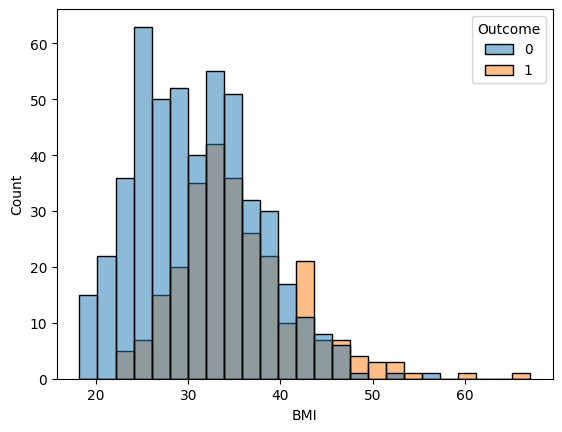

In [16]:
# remove BMIs < 10 from dataframe as likely to be an erroneous result
data_cleaned = data[data["BMI"]>10]
sns.histplot(data=data_cleaned, x="BMI", hue="Outcome")



In [51]:
# Split the dataset into 80/20 training/testing split with a random state of 42 using only BMI.

## PARTIAL CODE: 
# haven't removed BMI<10 and associated y values
X = pd.DataFrame(data["BMI"])
y= data["Outcome"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [54]:
# need to remove rows with BMI = 0 
data[data["BMI"]<10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [117]:
# 11 rows to remove
data[data["BMI"]<10].count()

Pregnancies                 11
Glucose                     11
BloodPressure               11
SkinThickness               11
Insulin                     11
BMI                         11
DiabetesPedigreeFunction    11
Age                         11
Outcome                     11
dtype: int64

In [126]:
# want to drop specific rows
data_cleaned_2 = data.drop(data[data['BMI'] == 0].index, inplace = False)
# checked and rows with BMI of zero have been removed 
data_cleaned_2[data_cleaned_2["BMI"]==0]




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<Axes: xlabel='BMI', ylabel='Count'>

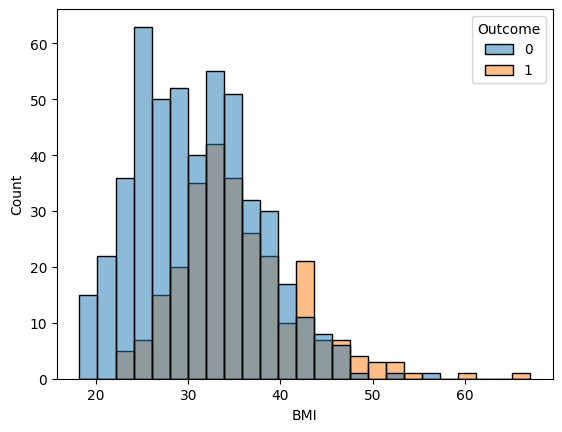

In [127]:
sns.histplot(data=data_cleaned_2, x="BMI", hue="Outcome")

In [128]:
X2 = pd.DataFrame(data_cleaned_2["BMI"])
y2= data_cleaned_2["Outcome"]

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2, random_state=42)

In [60]:
# Train the model and then predict on the test set.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X2_train, y2_train)

LogisticRegression()

In [61]:
lr.predict_proba(X2_test)[:,1]
y2_pred = lr.predict(X2_test)

In [62]:
# What is the accuracy of your predictions?
# (error)
# nick said this is not used for logistic regression
# special case as outcome is 1 and 0
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y2_test,y2_pred)

0.35526315789473684

In [63]:
# normalise default is True, so accuracy score returns fraction of correctly classified samples
# i.e., 66% of samples have been clasified correctly (agreement)
from sklearn.metrics import accuracy_score
accuracy_score(y2_test, y2_pred)

0.6447368421052632

In [64]:
# What are the probabilities of your predictions? 
# Do you have guesses as to why there are two columns for each? What do these correspond to?
# Column one is the probability of not having diabetes and column two is the probability of having diabetes
lr.predict_proba(X2_test)[:5]

array([[0.58640354, 0.41359646],
       [0.79511669, 0.20488331],
       [0.50861203, 0.49138797],
       [0.64585079, 0.35414921],
       [0.56591574, 0.43408426]])

In [7]:
# Using the entire dataset, split your data, train a model, get the predictions and calculate the accuracy.

<Axes: xlabel='Age', ylabel='Count'>

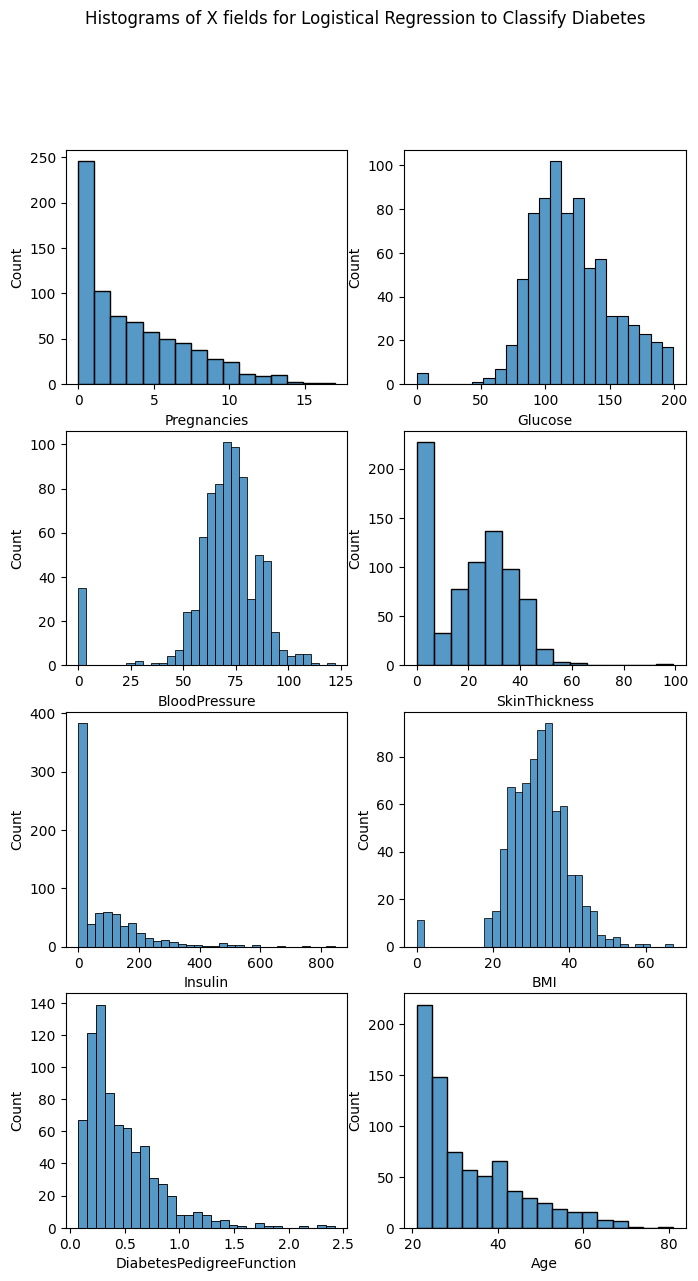

In [48]:
# Firstly, plot all fields to check distrubtion is sensible/there are no erroneous values
fig, axes = plt.subplots(
    nrows=4, 
    ncols=2,
    figsize=(8,14)
)
fig.suptitle("Histograms of X fields for Logistical Regression to Classify Diabetes")

sns.histplot(
    data=data,
    x = "Pregnancies",
    ax = axes[0, 0]
)
sns.histplot(
    data=data,
    x = "Glucose",
    ax = axes[0, 1]
)
sns.histplot(
    data=data,
    x = "BloodPressure",
    ax = axes[1, 0]
)
sns.histplot(
    data=data,
    x = "SkinThickness",
    ax = axes[1, 1]
)
sns.histplot(
    data=data,
    x = "Insulin",
    ax = axes[2, 0]
)
sns.histplot(
    data=data,
    x = "BMI",
    ax = axes[2, 1]
)
sns.histplot(
    data=data,
    x = "DiabetesPedigreeFunction",
    ax = axes[3, 0]
)
sns.histplot(
    data=data,
    x = "Age",
    ax = axes[3, 1]
)


In [112]:
# Remove glucose values that are zero
data[data["Glucose"]<20]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [113]:
# 5 rows to remove 
data[data["Glucose"]<20].count()

Pregnancies                 5
Glucose                     5
BloodPressure               5
SkinThickness               5
Insulin                     5
BMI                         5
DiabetesPedigreeFunction    5
Age                         5
Outcome                     5
dtype: int64

In [110]:
# Remove blood pressure values that are zero
data[data["BloodPressure"]<10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [111]:
# 35 rows to remove
data[data["BloodPressure"]<10].count()

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64

In [131]:
# 374 zero insulin values, unsure whether this is a true value or should be removed
# think it is possible to have no insulin
data[data["Insulin"]<10]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: xlabel='Insulin', ylabel='Count'>

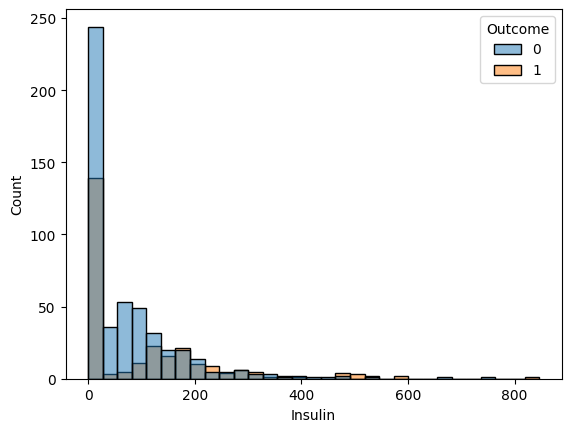

In [133]:
sns.histplot(data=data, x="Insulin", hue="Outcome")

In [151]:
# 15 pregnancies seems high but possible
# Glucose levels, suspect readings around zero are in different units, so will remove
# Similarly for blood pressure
data_cleaned_3 = data.drop(data[(data['BMI'] == 0) | (data['Glucose'] == 0) | (data['BloodPressure'] == 0)].index, inplace=False)
# check no rows are returned
data_cleaned_3[(data_cleaned_3["BMI"] == 0) | (data_cleaned_3["Glucose"] == 0) | (data_cleaned_3["BloodPressure"] == 0)]
# returns 724 rows was expecting 717
data_cleaned_3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: xlabel='Glucose', ylabel='Count'>

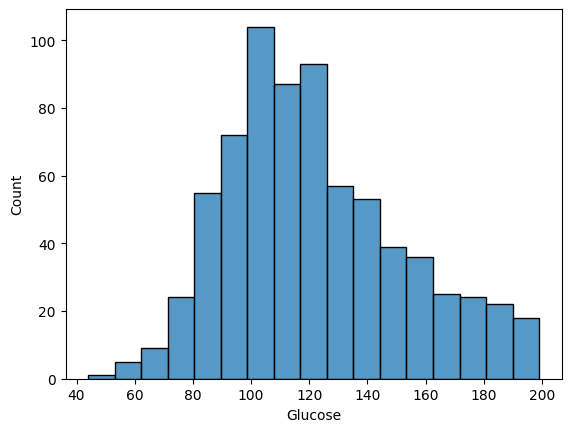

In [129]:
sns.histplot(data=data_cleaned_3, x="Glucose")

<Axes: xlabel='BloodPressure', ylabel='Count'>

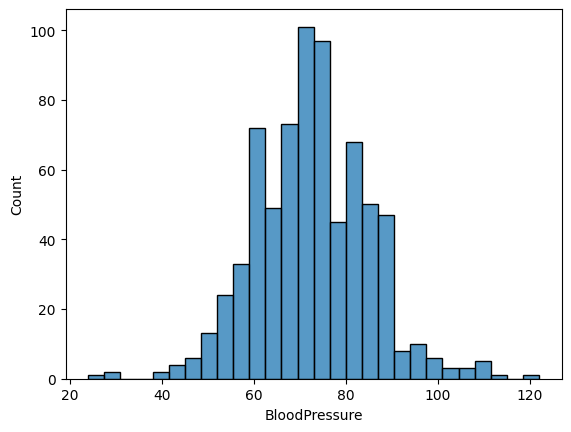

In [130]:
sns.histplot(data=data_cleaned_3, x="BloodPressure")

In [123]:
# 768 rows originally
# 5 zero values glucose column removed
# 35 zero values blood pressure removed
# 11 zero values BMI removed 
768 - (5 + 35 +11)

717

In [153]:
# multivariate logistic regression
X3 = data_cleaned_3.drop(["Outcome"], axis =1)
y3 = data_cleaned_3["Outcome"]

from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size=0.2, random_state=42)

In [174]:
# Train the model and then predict on the test set.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000)
lr.fit(X3_train, y3_train)

LogisticRegression(max_iter=1000)

In [160]:
# default iterations 100, warning max iterations reached
#print('multivariate beta_0 is',lr.intercept_)
#print('multivariate beta_1 is', lr.coef_)
#multivariate beta_0 is [-9.25102977]
#multivariate beta_1 is [[ 1.34967836e-01  3.67020895e-02 -1.18720297e-02 -1.18509171e-03
#  -7.58634462e-04  1.05226812e-01  1.01914323e+00  1.43570417e-02]]

multivariate beta_0 is [-9.25102977]
multivariate beta_1 is [[ 1.34967836e-01  3.67020895e-02 -1.18720297e-02 -1.18509171e-03
  -7.58634462e-04  1.05226812e-01  1.01914323e+00  1.43570417e-02]]


In [175]:
lr.predict_proba(X3_test)[:,1]
y3_pred = lr.predict(X3_test)
y3_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [176]:
from sklearn.metrics import accuracy_score
accuracy_score(y3_test, y3_pred)

0.8

In [8]:
# Logistic Regression Challenging Question:
# Using the univariate case (i.e. only using BMI to predict outcome), if you were to increase the BMI by 1 unit, 
# how much will the probability increase/decrease such that someone has diabetes? 
# Note: This isn't as easy as Linear Regression and takes some math :) 
# Hint: Fix the initial BMI to be something such as 10 and see how the probability increases when you increase the BMI
# by 1.

In [9]:
# Logistic Regression Challenging Question:
# Is accuracy the best metric to use for this dataset? Why or why not? Hint: Think about the outcomes distribution.